<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_1_python_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 6 Material

* **Part 6.1: Image Processing in Python** [[Video]](https://www.youtube.com/watch?v=V-IUrfTJMm4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_1_python_images.ipynb)
* Part 6.2: Using Convolutional Neural Networks [[Video]](https://www.youtube.com/watch?v=nU_T2PPigUQ&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_2_cnn.ipynb)
* Part 6.3: Using Pretrained Neural Networks with Keras [[Video]](https://www.youtube.com/watch?v=TXqI9fp0imI&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_3_resnet.ipynb)
* Part 6.4: Looking at Keras Generators and Image Augmentation [[Video]](https://www.youtube.com/watch?v=epfpxiXRL3U&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_4_keras_images.ipynb)
* Part 6.5: Recognizing Multiple Images with YOLOv5 [[Video]](https://www.youtube.com/watch?v=zwEmzElquHw&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_5_yolo.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [2]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

Note: not using Google CoLab


# Part 6.1: Image Processing in Python

Computer vision requires processing images. These images might come from a video stream, a camera, or files on a storage drive. We begin this chapter by looking at how to process images with Python. To use images in Python, we will make use of the Pillow package. The following program uses Pillow to load and display an image.

[[[199 213 240]
  [200 214 240]
  [200 214 240]
  ...
  [ 86  34  96]
  [ 48   4  57]
  [ 57  21  65]]

 [[199 213 239]
  [200 214 240]
  [200 214 240]
  ...
  [215 215 251]
  [252 242 255]
  [237 218 250]]

 [[200 214 240]
  [200 214 240]
  [201 215 241]
  ...
  [227 238 255]
  [167 180 197]
  [ 61  79  91]]

 ...

 [[136 112 108]
  [137 113 109]
  [140 116 112]
  ...
  [ 85  84  63]
  [ 91  90  69]
  [ 93  92  72]]

 [[119  90  84]
  [118  89  83]
  [119  90  84]
  ...
  [ 86  84  61]
  [ 89  87  64]
  [ 90  88  65]]

 [[129  96  89]
  [129  96  89]
  [131  98  91]
  ...
  [ 86  82  57]
  [ 89  85  60]
  [ 89  85  60]]]


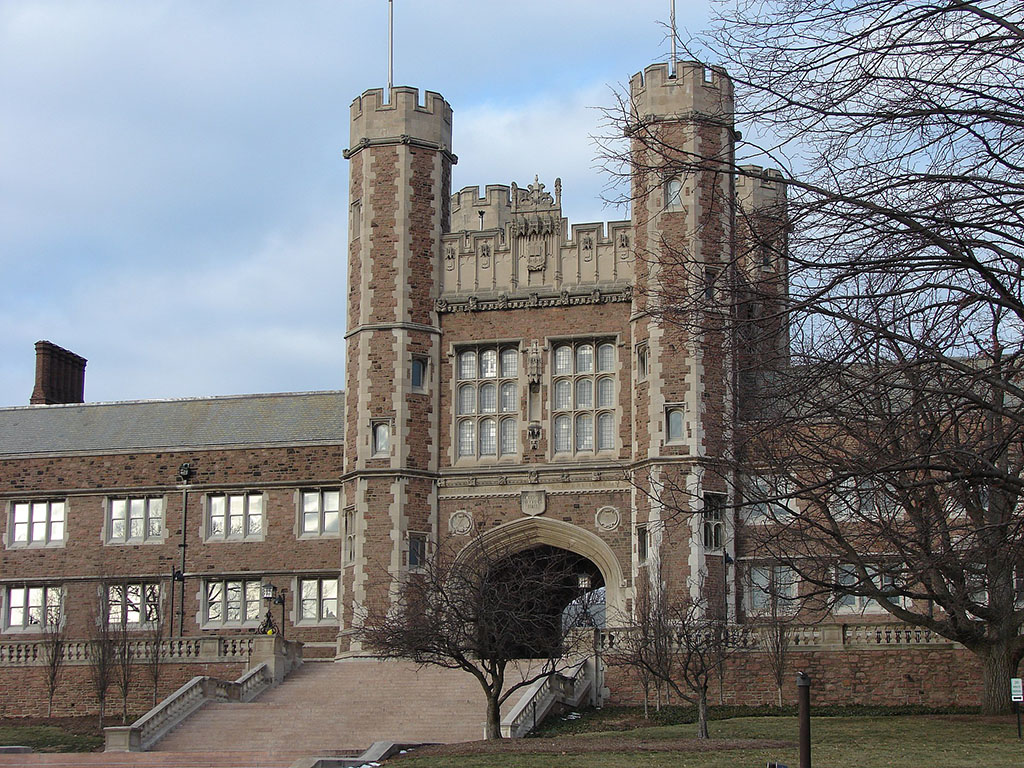

In [3]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

%matplotlib inline

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(BytesIO(response.content))
img.load()

print(np.asarray(img))

img

## Creating Images from Pixels in Python

You can use Pillow to create an image from a 3D NumPy cube-shaped array.  The rows and columns specify the pixels.  The third dimension (size 3) defines red, green, and blue color values.  The following code demonstrates creating a simple image from a NumPy array.

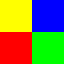

In [4]:
from PIL import Image
import numpy as np

w, h = 64, 64
data = np.zeros((h, w, 3), dtype=np.uint8)

# Yellow
for row in range(32):
    for col in range(32):
        data[row,col] = [255,255,0]
        
# Red
for row in range(32):
    for col in range(32):
        data[row+32,col] = [255,0,0]
        
# Green
for row in range(32):
    for col in range(32):
        data[row+32,col+32] = [0,255,0]        
        
# Blue
for row in range(32):
    for col in range(32):
        data[row,col+32] = [0,0,255]                
        

img = Image.fromarray(data, 'RGB')
img

## Transform Images in Python (at the pixel level)

We can combine the last two programs and modify images.  Here we take the mean color of each pixel and form a grayscale image.

Rows: 768, Cols: 1024


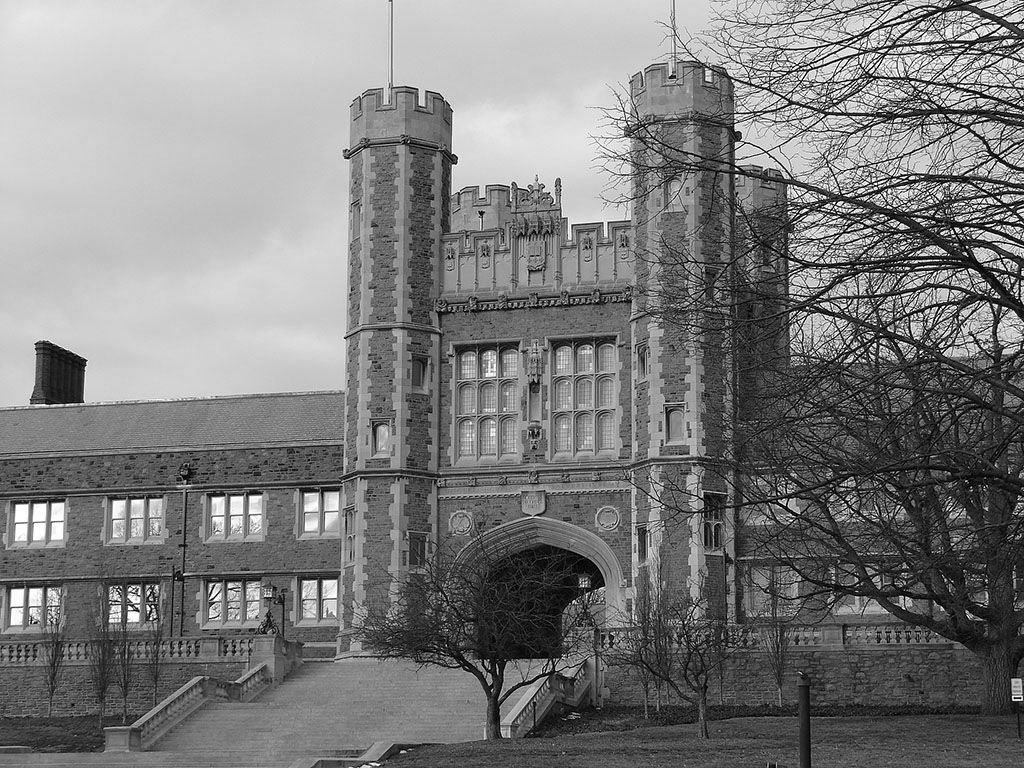

In [5]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"
response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})

img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = np.zeros((rows, cols, 3), dtype=np.uint8)
for row in range(rows):
    for col in range(cols):
        t = np.mean(img_array[row,col])
        img2_array[row,col] = [t,t,t]

img2 = Image.fromarray(img2_array, 'RGB')
img2  

## Standardize Images

When processing several images together, it is sometimes essential to standardize them.  The following code reads a sequence of images and causes them to all be of the same size and perfectly square.  If the input images are not square, cropping will occur.

In [6]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

images = [
  "https://data.heatonresearch.com/images/jupyter/brookings.jpeg",
  "https://data.heatonresearch.com/images/jupyter/SeigleHall.jpeg",
  "https://data.heatonresearch.com/images/jupyter/WUSTLKnight.jpeg"   
]

def crop_square(image):        
    width, height = image.size
    
    # Crop the image, centered
    new_width = min(width,height)
    new_height = new_width
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2
    return image.crop((left, top, right, bottom))
    
x = [] 
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
    img = Image.open(BytesIO(response.content))
    img.load()
    img = crop_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

## Adding Noise to an Image

Sometimes it is beneficial to add noise to images. We might use noise to augment images to generate more training data or modify images to test the recognition capabilities of neural networks. It is essential to see how to add noise to an image. There are many ways to add such noise. The following code adds random black squares to the image to produce noise.

In [ ]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline


def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

url = "https://data.heatonresearch.com/images/jupyter/brookings.jpeg"

response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2        
        

## Preprocessing Many Images

To download images, we define several paths. We will download sample images of paperclips from the URL specified by **DOWNLOAD_SOURCE**. Once downloaded, we will unzip and perform the preprocessing on these paper clips. I mean for this code as a starting point for other image preprocessing.

In [7]:
import os

URL = "https://github.com/jeffheaton/data-mirror/releases/"
#DOWNLOAD_SOURCE = URL+"download/v1/iris-image.zip"
DOWNLOAD_SOURCE = URL+"download/v1/paperclips.zip"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]

if COLAB:
  PATH = "/content"
  EXTRACT_TARGET = os.path.join(PATH,"clips")
  SOURCE = os.path.join(PATH, "/content/clips/paperclips")
  TARGET = os.path.join(PATH,"/content/clips-processed")
else:
  # I used this locally on my machine, you may need different
  PATH = "/Users/jeff/temp"
  EXTRACT_TARGET = os.path.join(PATH,"clips")
  SOURCE = os.path.join(PATH, "clips/paperclips")
  TARGET = os.path.join(PATH,"clips-processed")

Next, we download the images. This part depends on the origin of your images. The following code downloads images from a URL, where a ZIP file contains the images. The code unzips the ZIP file.

In [8]:
# HIDE OUTPUT
!wget -O {os.path.join(PATH,DOWNLOAD_NAME)} {DOWNLOAD_SOURCE}
!mkdir -p {SOURCE}
!mkdir -p {TARGET}
!mkdir -p {EXTRACT_TARGET}
!unzip -o -j -d {SOURCE} {os.path.join(PATH, DOWNLOAD_NAME)} >/dev/null

'wget' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The syntax of the command is incorrect.
The system cannot find the path specified.


The following code contains functions that we use to preprocess the images. The **crop_square** function converts images to a square by cropping extra data. The **scale** function increases or decreases the size of an image. The **standardize** function ensures an image is full color; a mix of color and grayscale images can be problematic.

In [ ]:
import imageio
import glob
from tqdm import tqdm
from PIL import Image
import os
        
def scale(img, scale_width, scale_height):
    # Scale the image
    img = img.resize((
        scale_width, 
        scale_height), 
        Image.ANTIALIAS)
            
    return img

def standardize(image):
    rgbimg = Image.new("RGB", image.size)
    rgbimg.paste(image)
    return rgbimg

def fail_below(image, check_width, check_height):
    width, height = image.size
    assert width == check_width
    assert height == check_height    


Next, we loop through each image. The images are loaded, and you can apply any desired transformations. Ultimately, the script saves the images as JPG.

In [ ]:
files = glob.glob(os.path.join(SOURCE,"*.jpg"))

for file in tqdm(files):
    try:
        target = ""
        name = os.path.basename(file)
        filename, _ = os.path.splitext(name)
        img = Image.open(file)
        img = standardize(img)
        img = crop_square(img)
        img = scale(img, 128, 128)
        #fail_below(img, 128, 128)

        target = os.path.join(TARGET,filename+".jpg")
        img.save(target, quality=25)
    except KeyboardInterrupt:
        print("Keyboard interrupt")
        break
    except AssertionError:
        print("Assertion")
        break
    except:
        print("Unexpected exception while processing image source: " \
              f"{file}, target: {target}" , exc_info=True)

100%|██████████| 25000/25000 [01:32<00:00, 268.82it/s]


Now we can zip the preprocessed files and store them somewhere.

# Module 6 Assignment

You can find the first assignment here: [assignment 6](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class6.ipynb)